In [10]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])

In [36]:
df = pd.get_dummies(df, columns = ['region'])
#print(df)

In [37]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


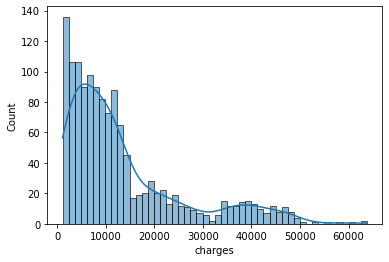

In [38]:
sns.histplot(data=df, x='charges', bins=50 ,kde=True);

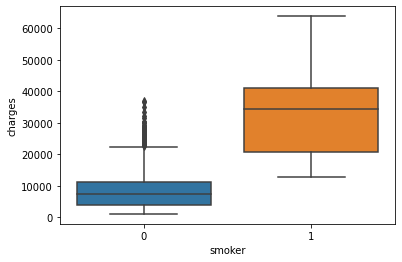

In [39]:
sns.boxplot(data=df, x='smoker', y='charges');

In [42]:
x = df[['age','sex','bmi','children','smoker','region_northeast','region_northwest','region_southeast','region_southwest']]
y = df['charges']

In [43]:
print(x)
print("-----------------")
print(y)

      age  sex     bmi  children  smoker  region_northeast  region_northwest  \
0      19    0  27.900         0       1                 0                 0   
1      18    1  33.770         1       0                 0                 0   
2      28    1  33.000         3       0                 0                 0   
3      33    1  22.705         0       0                 0                 1   
4      32    1  28.880         0       0                 0                 1   
...   ...  ...     ...       ...     ...               ...               ...   
1333   50    1  30.970         3       0                 0                 1   
1334   18    0  31.920         0       0                 1                 0   
1335   18    0  36.850         0       0                 0                 0   
1336   21    0  25.800         0       0                 0                 0   
1337   61    0  29.070         0       1                 0                 1   

      region_southeast  region_southwes

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

#LINEAR REGRESSION

In [45]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le_model = le.fit(x_train,y_train)
le_Y_predict = le_model.predict(x_test)

In [54]:
print('MSE of Linear Regression : ' + str(mean_squared_error(y_test,le_Y_predict)))
print('r2 score of Linear Regression : ' + str(r2_score(y_test,le_Y_predict)))

MSE of Linear Regression : 36760345.443710454
r2 score of Linear Regression : 0.741545044742475


#DecisionTreeRegressor

In [56]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr_model = dtr.fit(x_train,y_train)
dtr_y_predict = dtr_model.predict(x_test)

In [57]:
print('MSE of DecisionTreeRegressor : ' + str(mean_squared_error(y_test,dtr_y_predict)))
print('r2 score of DecisionTreeRegressor : ' + str(r2_score(y_test,dtr_y_predict)))

MSE of DecisionTreeRegressor : 43459199.84589959
r2 score of DecisionTreeRegressor : 0.6944466811689984


#KNN

In [59]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn_model = knn.fit(x_train,y_train)
knn_y_predict = knn_model.predict(x_test)

In [63]:
print('MSE of KNeighborsRegressor : ' + str(mean_squared_error(y_test,knn_y_predict)))
print('r2 score of KNeighborsRegressor : ' + str(r2_score(y_test,knn_y_predict)))

MSE of KNeighborsRegressor : 131421953.95599405
r2 score of KNeighborsRegressor : 0.07599738741398276


In [85]:
#XG BOOSTING

In [84]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb_model = xgb.fit(x_train,y_train)
# predicting values for test data
xgb_y_predict = xgb_model.predict(x_test)

In [86]:
print('MSE of AdaBoostRegressor : ' + str(mean_squared_error(y_test,xgb_y_predict)))
print('r2 score of AdaBoostRegressor : ' + str(r2_score(y_test,xgb_y_predict)))

MSE of AdaBoostRegressor : 26844894.68250938
r2 score of AdaBoostRegressor : 0.8112586818672557


In [87]:
#RANDOM FOREST

In [88]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_model = rf.fit(x_train,y_train)
rf_y_predict = rf_model.predict(x_test)

In [89]:

print('MSE of RandomForestRegressor : ' + str(mean_squared_error(y_test,rf_y_predict)))
print('r2 score of RandomForestRegressor : ' + str(r2_score(y_test,rf_y_predict)))

MSE of RandomForestRegressor : 23653397.22070749
r2 score of RandomForestRegressor : 0.8336974898745847
